<a href="https://colab.research.google.com/github/PrateekR16/constructiveness-politeness/blob/main/Contructiveness_Politeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1 - H non
2- non
3 - neu
4 - con
5 -high con

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IIT Patna/dataset.csv')
df

,Venue,Review ID,review,N/C,Tone,Journal name,ESI,Article title,Review URL
0,ICLR,rywDjg-RW_R3,"Still , it would be nice to know what is going...",1,3,NaN,NaN,NaN,NaN
1,ICLR,B1DmUzWAW_R3,"- At last , some relief. The paper ended",1,1,NaN,NaN,NaN,NaN
2,ICLR,B1QgVti6Z_R3,Even if they are loose - identifying the degre...,1,3,NaN,NaN,NaN,NaN
3,ICLR,BJ8c3f-0b_R1,There are a few things I think could be cleare...,1,2,NaN,NaN,NaN,NaN
4,ICLR,BJDEbngCZ_R1,The paper is quite cumbersome and should be im...,1,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2710,ShitMyReviews,NaN,"This seems like a fishing expedition, please e...",5,2,NaN,NaN,NaN,NaN
2711,ShitMyReviews,NaN,The scales appear to be not divided into quart...,5,1,NaN,NaN,NaN,NaN
2712,ShitMyReviews,NaN,My summary assessment of the paper is as follo...,5,2,NaN,NaN,NaN,NaN
2713,ShitMyReviews,NaN,But there have been treatments along these exa...,5,3,NaN,NaN,NaN,NaN


In [ ]:
config = [[5,1,45,3],[5,2,30,3],[4,1,87,3],[4,2,30,3],[2,3,76,1],[2,2,65,1],[1,3,39,1],[1,2,33,1]]

In [ ]:
for i in range(len(config)) :
  highly_constructive_and_impolite = df[
    (df['N/C'] == config[i][0]) & (df['Tone'] == config[i][1])]
  impolite_to_keep = highly_constructive_and_impolite.sample(n=config[i][2], random_state=42)
  df.loc[impolite_to_keep.index, 'Tone'] = config[i][3]

In [ ]:
df.to_csv('new.csv',index=False)

In [ ]:
df2 = pd.read_csv('/content/new.csv')

In [ ]:
contingency_table = pd.crosstab(df2['N/C'], df2['Tone'])
contingency_table

Tone,1,2,3
N/C,,,
1,149,83,31
2,343,212,82
3,320,475,270
4,55,213,227
5,32,89,134


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Venue          2715 non-null   object
 1   Review ID      1820 non-null   object
 2   review         2714 non-null   object
 3   N/C            2715 non-null   int64 
 4   Tone           2715 non-null   int64 
 5   Journal name   314 non-null    object
 6   ESI            311 non-null    object
 7   Article title  314 non-null    object
 8   Review URL     208 non-null    object
dtypes: int64(2), object(7)
memory usage: 191.0+ KB


In [ ]:
df2.describe()

,N/C,Tone
count,2715.000000,2715.000000
mean,2.941805,1.942910
std,1.084969,0.775963
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,3.000000
max,5.000000,3.000000


In [ ]:
df1 = df[["N/C","Tone"]]

In [ ]:
df1

,N/C,Tone
0,1,1
1,1,1
2,1,3
3,1,1
4,1,2
...,...,...
2710,5,3
2711,5,1
2712,5,2
2713,5,3


In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


Chi-Square Statistic: 449.5349324242123
P-value: 4.6514480525594966e-92
Degrees of Freedom: 8


In [ ]:
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between constructiveness and politeness.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between constructiveness and politeness.")


Significance Level (alpha): 0.05
Reject the null hypothesis. There is a significant relationship between constructiveness and politeness.


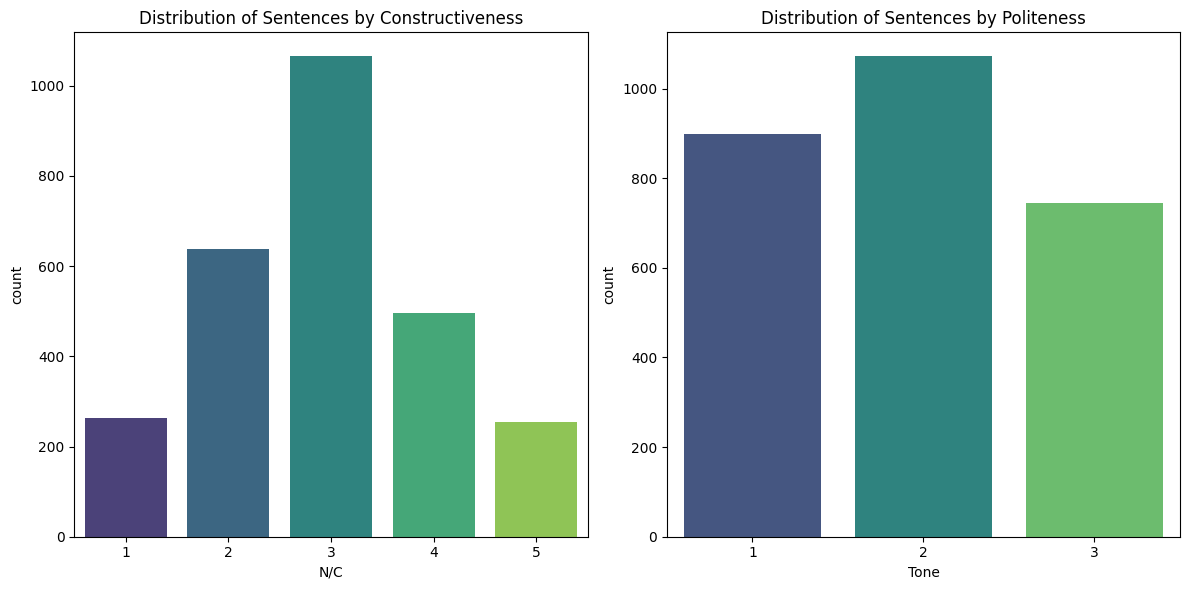

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df2, x='N/C', palette='viridis')
plt.title('Distribution of Sentences by Constructiveness')

plt.subplot(1, 2, 2)
sns.countplot(data=df2, x='Tone', palette='viridis')
plt.title('Distribution of Sentences by Politeness')

plt.tight_layout()
plt.show()

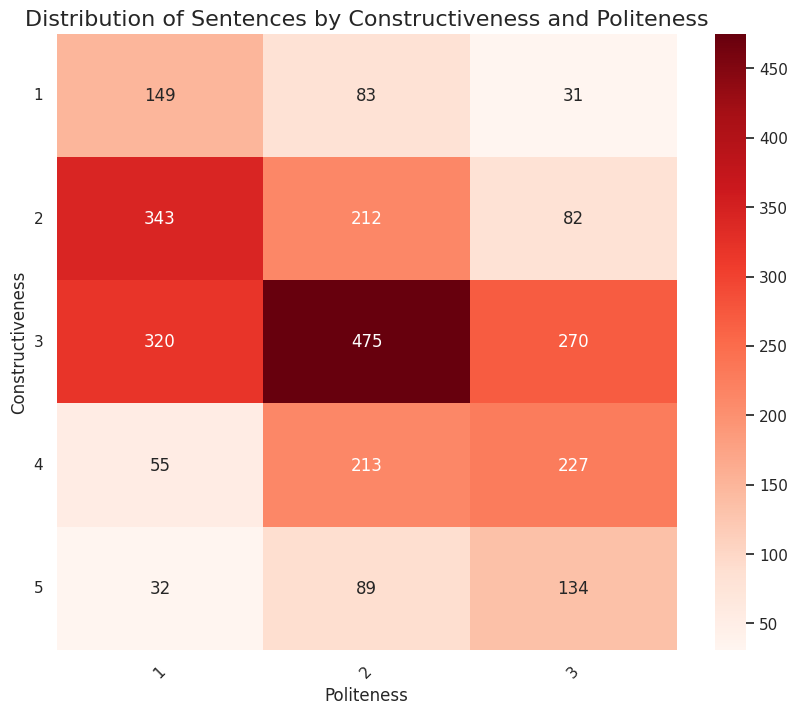

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a custom colormap with shades of red
custom_colors = sns.color_palette("Reds", as_cmap=True)

# Set a more visually appealing style
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(10, 8))

# Create the heatmap with the custom colormap
heatmap = sns.heatmap(contingency_table, annot=True, fmt='d', cmap=custom_colors, cbar=True)

# Customize the heatmap
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Add a title
plt.title('Distribution of Sentences by Constructiveness and Politeness', fontsize=16)

# Label the axes
plt.xlabel('Politeness', fontsize=12)
plt.ylabel('Constructiveness', fontsize=12)

# Show the plot
plt.show()


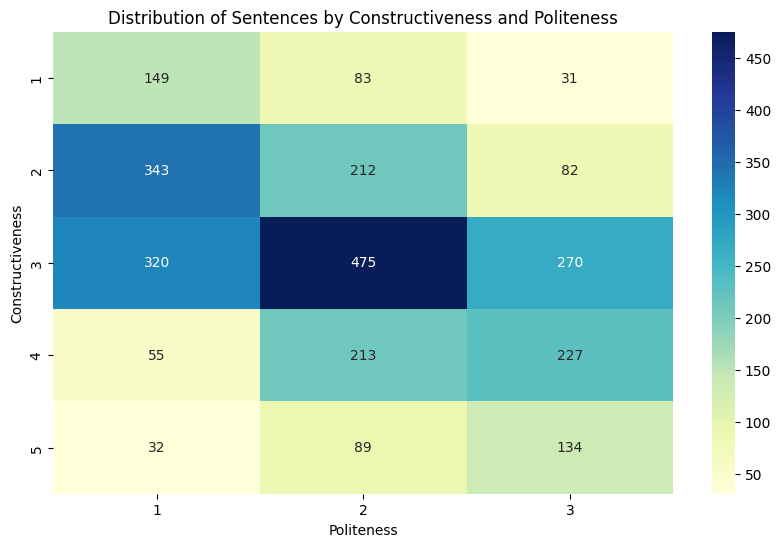

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Distribution of Sentences by Constructiveness and Politeness')
plt.xlabel('Politeness')
plt.ylabel('Constructiveness')
plt.show()

<Figure size 1200x600 with 0 Axes>

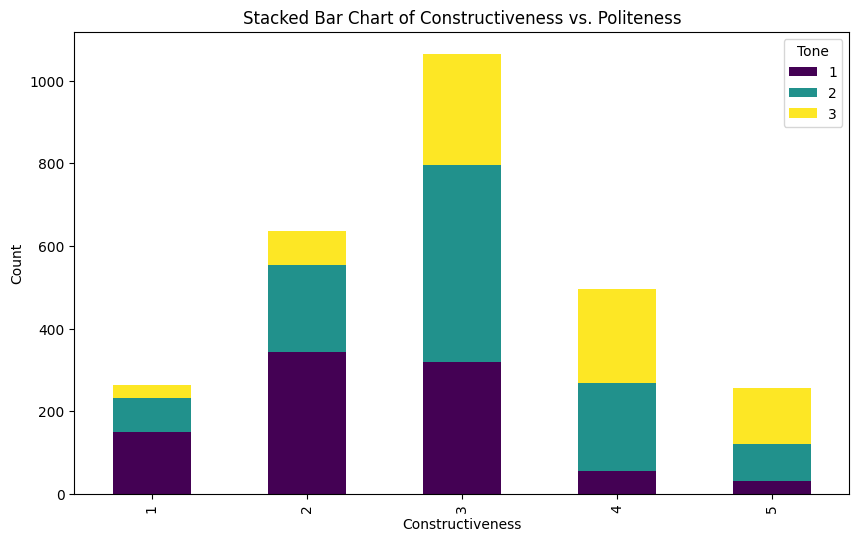

In [ ]:
plt.figure(figsize=(12, 6))

ct = pd.crosstab(df2['N/C'], df2['Tone'])
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Stacked Bar Chart of Constructiveness vs. Politeness')
plt.xlabel('Constructiveness')
plt.ylabel('Count')

plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('punkt')

# Sample text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing and removing punctuation
    tokens = [word.lower() for word in tokens if word not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming (you can also use lemmatization)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a single string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['Preprocessed_Text'] = df['review'].apply(lambda x: preprocess_text(str(x)))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Text'])


In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['N/C'] = df['N/C']
tfidf_df['Tone'] = df['Tone']

In [ ]:
tfidf_grouped = tfidf_df.groupby(['N/C', 'Tone']).mean()

In [ ]:
n_top_terms = 10
important_terms = {}
for (constructiveness, politeness), scores in tfidf_grouped.iterrows():
    top_terms = scores[:-2].sort_values(ascending=False).head(n_top_terms).index.tolist()
    important_terms[(constructiveness, politeness)] = top_terms

for (constructiveness, politeness), terms in important_terms.items():
    print(f"Constructiveness: {constructiveness}, Politeness: {politeness}")
    print("Top Terms:", terms)
    print()

Constructiveness: 1, Politeness: 1
Top Terms: ['author', 'like', 'paper', 'comment', 'none', 'research', 'review', 'end', 'neither', 'realli']

Constructiveness: 1, Politeness: 2
Top Terms: ['author', 'paper', 'read', 'comment', 'stop', 'work', 'review', 'like', 'would', 'one']

Constructiveness: 1, Politeness: 3
Top Terms: ['paper', 'author', 'review', 'none', 'would', 'piec', 'mistak', 'correct', 'want', 'manuscript']

Constructiveness: 2, Politeness: 1
Top Terms: ['paper', 'author', 'like', 'result', 'seem', 'much', 'read', 'think', 'see', 'contribut']

Constructiveness: 2, Politeness: 2
Top Terms: ['paper', 'author', 'read', 'use', 'work', 'would', 'make', 'review', 'seem', 'result']

Constructiveness: 2, Politeness: 3
Top Terms: ['paper', 'comment', 'read', 'work', 'manuscript', 'author', 'interest', 'novelti', 'propos', 'review']

Constructiveness: 3, Politeness: 1
Top Terms: ['paper', 'comment', 'author', 'manuscript', 'use', 'well', 'review', 'attach', 'problem', 'question']

C

In [ ]:
!pip install textblob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(sentence):
    if isinstance(sentence, str):
        analysis = TextBlob(sentence)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'NaN'

df2['Text'] = df2['review'].astype(str)
df2['Sentiment'] = df2['review'].apply(get_sentiment)

In [ ]:
df2

,Venue,Review ID,review,N/C,Tone,Journal name,ESI,Article title,Review URL
0,ICLR,rywDjg-RW_R3,"Still , it would be nice to know what is going...",1,1,NaN,NaN,NaN,NaN
1,ICLR,B1DmUzWAW_R3,"- At last , some relief. The paper ended",1,1,NaN,NaN,NaN,NaN
2,ICLR,B1QgVti6Z_R3,Even if they are loose - identifying the degre...,1,3,NaN,NaN,NaN,NaN
3,ICLR,BJ8c3f-0b_R1,There are a few things I think could be cleare...,1,1,NaN,NaN,NaN,NaN
4,ICLR,BJDEbngCZ_R1,The paper is quite cumbersome and should be im...,1,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2710,ShitMyReviews,NaN,"This seems like a fishing expedition, please e...",5,3,NaN,NaN,NaN,NaN
2711,ShitMyReviews,NaN,The scales appear to be not divided into quart...,5,1,NaN,NaN,NaN,NaN
2712,ShitMyReviews,NaN,My summary assessment of the paper is as follo...,5,2,NaN,NaN,NaN,NaN
2713,ShitMyReviews,NaN,But there have been treatments along these exa...,5,3,NaN,NaN,NaN,NaN


In [ ]:
sentiment_stats = df2.groupby(['N/C', 'Tone', 'Sentiment']).size().unstack(fill_value=0)
sentiment_stats['Total'] = sentiment_stats.sum(axis=1)
sentiment_stats_percentage = sentiment_stats.div(sentiment_stats['Total'], axis=0) * 100

In [ ]:
sentiment_stats

Sentiment  NaN  Negative  Neutral  Positive  Total
N/C Tone                                          
1   1        0        35       45        69    149
    2        0        26       32        25     83
    3        0        11        7        13     31
2   1        0       105       96       142    343
    2        0        79       53        80    212
    3        0        26       22        34     82
3   1        1        72      101       146    320
    2        0       117      149       209    475
    3        0        68       78       124    270
4   1        0        14       11        30     55
    2        0        45       41       127    213
    3        0        54       55       118    227
5   1        0         5        2        25     32
    2        0        12        8        69     89
    3        0        28        9        97    134

In [ ]:
import pandas as pd
def recode_constructiveness(constructiveness):
    if constructiveness in [1, 2]:
        return "Non-Constructive"
    elif constructiveness in [4, 5]:
        return "Constructive"
    else:
        return "Neutral"

df['Combined_Constructiveness'] = df['N/C'].apply(recode_constructiveness)


In [ ]:
# Create a crosstab
crosstab = pd.crosstab(df['Combined_Constructiveness'], df['Tone'])
crosstab

Tone,1,2,3
Combined_Constructiveness,,,
Constructive,87,302,361
Neutral,320,475,270
Non-Constructive,492,295,113


In [ ]:
import scipy.stats as stats

# Perform chi-squared test for independence
chi2, p, _, _ = stats.chi2_contingency(crosstab)

# Print the test statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 443.20145749072
P-value: 1.2810111265459266e-94


In [ ]:
df2

,Venue,Review ID,review,N/C,Tone,Journal name,ESI,Article title,Review URL
0,ICLR,rywDjg-RW_R3,"Still , it would be nice to know what is going...",1,1,NaN,NaN,NaN,NaN
1,ICLR,B1DmUzWAW_R3,"- At last , some relief. The paper ended",1,1,NaN,NaN,NaN,NaN
2,ICLR,B1QgVti6Z_R3,Even if they are loose - identifying the degre...,1,3,NaN,NaN,NaN,NaN
3,ICLR,BJ8c3f-0b_R1,There are a few things I think could be cleare...,1,1,NaN,NaN,NaN,NaN
4,ICLR,BJDEbngCZ_R1,The paper is quite cumbersome and should be im...,1,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2710,ShitMyReviews,NaN,"This seems like a fishing expedition, please e...",5,3,NaN,NaN,NaN,NaN
2711,ShitMyReviews,NaN,The scales appear to be not divided into quart...,5,1,NaN,NaN,NaN,NaN
2712,ShitMyReviews,NaN,My summary assessment of the paper is as follo...,5,2,NaN,NaN,NaN,NaN
2713,ShitMyReviews,NaN,But there have been treatments along these exa...,5,3,NaN,NaN,NaN,NaN


In [ ]:
df2["Venue"].value_counts()

ICLR             1349
ShitMyReviews     886
Publons           314
NIPS              166
Name: Venue, dtype: int64

In [ ]:
count_data = df2.groupby(["Venue", "Tone", "N/C"]).size().reset_index(name="Count")

In [ ]:
count_data

,Venue,Tone,N/C,Count
0,ICLR,1,1,49
1,ICLR,1,2,143
2,ICLR,1,3,173
3,ICLR,1,4,34
4,ICLR,1,5,5
5,ICLR,2,1,21
6,ICLR,2,2,78
7,ICLR,2,3,290
8,ICLR,2,4,155
9,ICLR,2,5,12


In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go

fig = sp.make_subplots(rows=2, cols=2, subplot_titles=["Publons", "NeurIPS", "ShitMyReviewersSay", "ICLR"],
                       specs=[[{'type': 'pie'}, {'type': 'pie'}],
                              [{'type': 'pie'}, {'type': 'pie'}]])

# Generate a pie chart for each venue
for i, venue in enumerate(df2['Venue'].unique()):
    data = count_data[count_data['Venue'] == venue]
    for j, label in enumerate(["Tone"]):
        labels = data[label]
        values = data['Count']

        # trace = go.Pie(labels=labels, values=values, name=label)
        trace = go.Pie(labels=labels, values=values, name=label, legendgroup=i)  # Set legendgroup to i
        fig.add_trace(trace, row=i // 2 + 1, col=i % 2 + 1)

# Customize the layout
fig.update_layout(title="Politeness Label Counts by Venue", showlegend=False)
fig.update_layout(height=500, width=600)
fig.update_layout(showlegend=True)

# Show the pie charts
fig.show()

In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go

custom_order = df2['N/C'].unique()
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=["Publons", "NeurIPS", "ShitMyReviewersSay", "ICLR"],
                       specs=[[{'type': 'pie'}, {'type': 'pie'}],
                              [{'type': 'pie'}, {'type': 'pie'}]])

# Generate a pie chart for each venue
for i, venue in enumerate(df['Venue'].unique()):
    data = count_data[count_data['Venue'] == venue]
    for j, label in enumerate(["N/C"]):
        labels = data[label]
        values = data['Count']

        trace = go.Pie(labels=labels, values=values, name=label,)
        fig.add_trace(trace, row=i // 2 + 1, col=i % 2 + 1)

# Customize the layout
fig.update_layout(title="Constructive Label Counts by Venue", showlegend=True)
fig.update_layout(height=500, width=600)
fig.update_layout(legend={'traceorder':'reversed'})
# fig.update_layout(showlegend=True)

# Show the pie charts
fig.show()